In [1]:
import cv2
import numpy as np
import tensorflow as tf
from google.colab import drive
from google.colab.patches import cv2_imshow
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Input, Dense, GlobalAveragePooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os




In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_dir = '/content/drive/MyDrive/EMNC/Imagens das Placas Solares/train_set'
test_dir = '/content/drive/MyDrive/EMNC/Imagens das Placas Solares/test_set'
val_dir = '/content/drive/MyDrive/EMNC/Imagens das Placas Solares/val_set'

In [4]:
dataset_treinamento = ImageDataGenerator(rotation_range = 35, fill_mode = 'constant', cval = 0).flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=10,
    class_mode='categorical',
    shuffle=True
)

Found 1994 images belonging to 2 classes.


In [5]:
dataset_teste = ImageDataGenerator().flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

Found 428 images belonging to 2 classes.


In [6]:
dataset_validacao = ImageDataGenerator().flow_from_directory(
    val_dir,
    target_size=(256, 256),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

Found 428 images belonging to 2 classes.


In [7]:
## REDE NEURAL ARQUITETURA ###
rede = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_tensor= Input(shape=(256,256,3)))

for layer in rede.layers :
  layer.trainable = False

head_model = rede.output
head_model = GlobalAveragePooling2D()(head_model)
head_model = Dense(units = 1025, activation = 'relu')(head_model)
#head_model = Dropout(rate = 0.2)(head_model)
head_model = Dense(units = 1025, activation = 'relu')(head_model)
#head_model = Dropout(rate = 0.2)(head_model)

head_model = Dense(units = 2, activation = 'softmax')(head_model)

rede= Model(inputs = rede.inputs, outputs = head_model)

######

94765736/94765736 [==============================] - 1s 0us/step


In [8]:
rede.compile(optimizer = 'adagrad', loss = 'categorical_crossentropy', metrics = ['accuracy'])

treinamento = rede.fit(dataset_treinamento,
                        epochs = 60,
                       validation_data = dataset_validacao,
                        validation_steps = dataset_validacao.samples //10 )





Epoch 1/60
 71/200 [=========>....................] - ETA: 4:18 - loss: 0.5964 - accuracy: 0.6761

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


200/200 [==============================] - 446s 2s/step - loss: 0.4776 - accuracy: 0.7633 - val_loss: 0.4275 - val_accuracy: 0.8333
Epoch 2/60
200/200 [==============================] - 54s 272ms/step - loss: 0.3629 - accuracy: 0.8440 - val_loss: 0.3336 - val_accuracy: 0.9048
Epoch 3/60
200/200 [==============================] - 55s 276ms/step - loss: 0.3248 - accuracy: 0.8586 - val_loss: 0.3071 - val_accuracy: 0.9286
Epoch 4/60
200/200 [==============================] - 54s 270ms/step - loss: 0.3035 - accuracy: 0.8811 - val_loss: 0.2955 - val_accuracy: 0.9286
Epoch 5/60
200/200 [==============================] - 54s 273ms/step - loss: 0.2914 - accuracy: 0.8852 - val_loss: 0.2038 - val_accuracy: 0.9286
Epoch 6/60
200/200 [==============================] - 55s 273ms/step - loss: 0.2714 - accuracy: 0.8897 - val_loss: 0.1710 - val_accuracy: 0.9286
Epoch 7/60
200/200 [==============================] - 54s 270ms/step - loss: 0.2591 - accuracy: 0.8942 - val_loss: 0.3582 - val_accuracy: 0.881

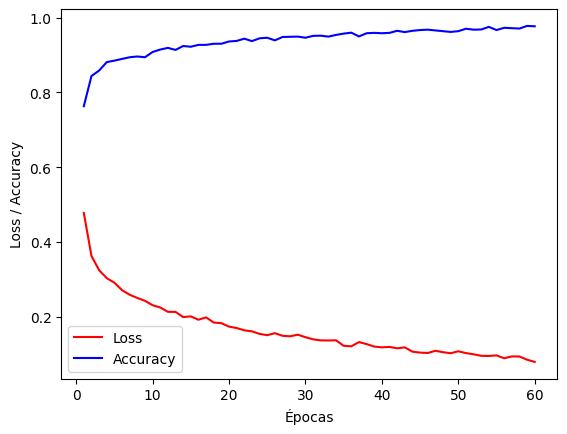

In [9]:
loss = treinamento.history['loss']
accuracy = treinamento.history['accuracy']

# Definir o número de épocas
epocas = range(1, len(loss) + 1)

# Criar uma nova figura
plt.figure()

# Traçar o gráfico de loss
plt.plot(epocas, loss, 'r', label='Loss')

# Traçar o gráfico de accuracy
plt.plot(epocas, accuracy, 'b', label='Accuracy')

# Adicionar rótulos aos eixos
plt.xlabel('Épocas')
plt.ylabel('Loss / Accuracy')

# Adicionar uma legenda
plt.legend()

# Exibir o gráfico
plt.show()

In [10]:
previsoes_teste = rede.predict(dataset_teste)


428/428 [==============================] - 157s 365ms/step


In [11]:
previsoes_teste = np.argmax(previsoes_teste, axis=1)

In [12]:
from sklearn.metrics import accuracy_score

accuracy_score(dataset_teste.classes, previsoes_teste)

0.8434579439252337

              precision    recall  f1-score   support

           0       0.91      0.77      0.83       214
           1       0.80      0.92      0.85       214

    accuracy                           0.84       428
   macro avg       0.85      0.84      0.84       428
weighted avg       0.85      0.84      0.84       428



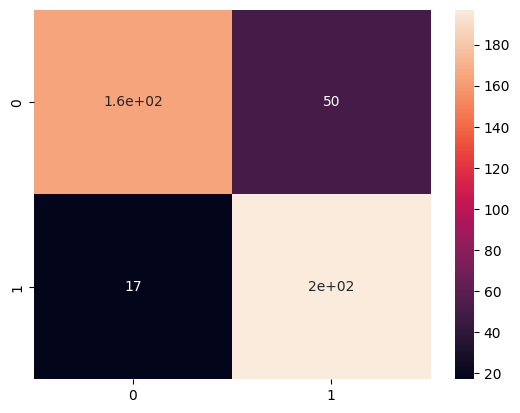

In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(dataset_teste.classes, previsoes_teste))
cm_teste = confusion_matrix(dataset_teste.classes, previsoes_teste)
sns.heatmap(cm_teste, annot=True);

428/428 [==============================] - 137s 320ms/step
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       214
           1       0.91      0.94      0.93       214

    accuracy                           0.93       428
   macro avg       0.93      0.93      0.93       428
weighted avg       0.93      0.93      0.93       428



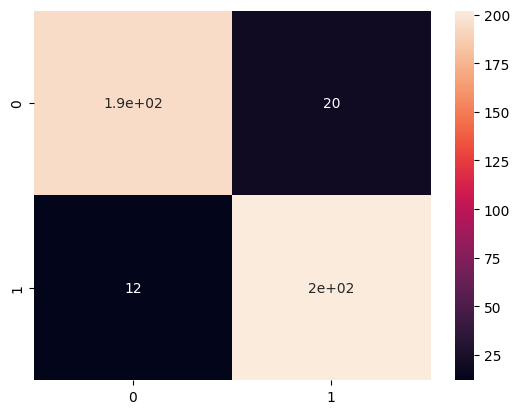

In [14]:
previsoes_val = rede.predict(dataset_validacao)
previsoes_val = np.argmax(previsoes_val, axis=1)
accuracy_score(dataset_validacao.classes, previsoes_val)
print(classification_report(dataset_teste.classes, previsoes_val))
cm_val = confusion_matrix(dataset_validacao.classes, previsoes_val)
sns.heatmap(cm_val, annot=True);

In [15]:
accuracy_score(dataset_validacao.classes, previsoes_val)

0.9252336448598131